# Exploratieve Data-analyse

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Zon & Wind

In [2]:
opwekking = pd.read_csv("data/time_series_60min_singleindex_filtered.csv",
                        usecols=(lambda s: s.startswith('utc') | s.startswith('DE')),
                        parse_dates=[0], index_col=0)


In [3]:
opwekking.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125593 entries, 2004-12-31 23:00:00+00:00 to 2019-04-30 23:00:00+00:00
Data columns (total 16 columns):
DE_load_actual_entsoe_power_statistics    114694 non-null float64
DE_load_actual_entsoe_transparency        37945 non-null float64
DE_load_forecast_entsoe_transparency      37753 non-null float64
DE_price_day_ahead                        124927 non-null float64
DE_solar_capacity                         123217 non-null float64
DE_solar_generation_actual                64190 non-null float64
DE_solar_profile                          61819 non-null float64
DE_wind_capacity                          123217 non-null float64
DE_wind_generation_actual                 81758 non-null float64
DE_wind_profile                           79384 non-null float64
DE_wind_offshore_capacity                 82994 non-null float64
DE_wind_offshore_generation_actual        29183 non-null float64
DE_wind_offshore_profile                  26809 non-null fl

In [4]:
opwekking.describe()

,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
count,114694.000000,37945.000000,37753.000000,124927.000000,123217.000000,64190.000000,61819.000000,123217.000000,81758.000000,79384.000000,82994.000000,29183.000000,26809.000000,123217.000000,81758.000000,79384.000000
mean,59862.309495,56118.012228,55257.209493,41.970970,22676.786823,3861.153170,0.102108,30801.724592,7837.890286,0.196524,1947.383799,1948.054861,0.393019,29490.016597,7020.030798,0.189499
std,10753.780340,10072.511904,9522.012413,24.723946,16106.182816,6007.199875,0.157421,13113.293611,7421.517625,0.164004,2115.549488,1396.202295,0.270919,11271.109526,6616.586951,0.163119
min,31850.549450,31455.000000,28824.000000,-500.020000,1118.000000,0.000000,0.000000,14152.000000,29.000000,0.000800,5.000000,0.000000,0.000000,14152.000000,28.000000,0.000800
25%,50839.721876,47698.000000,47379.000000,29.110000,4653.000000,0.000000,0.000000,20335.000000,2513.000000,0.072200,188.000000,666.000000,0.136200,20335.000000,2308.000000,0.067700
50%,59791.208791,55847.000000,55230.000000,39.100000,26071.000000,116.000000,0.003200,26716.000000,5386.500000,0.146600,622.000000,1802.000000,0.373800,26528.000000,4844.000000,0.138200
75%,69162.052983,65003.000000,63504.000000,51.680000,38361.000000,6058.000000,0.161400,40831.000000,10649.750000,0.274500,3908.000000,3051.000000,0.637800,37791.000000,9473.000000,0.262800
max,87784.615385,79063.000000,75912.000000,2436.630000,44958.000000,30028.000000,0.790800,58901.000000,45085.000000,0.912600,6380.000000,5936.000000,0.950000,52521.000000,40389.000000,0.915300


In [5]:
opwekking.head(10)

,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,,
2004-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,1118.0,NaN,NaN,14152.0,NaN,NaN,NaN,NaN,NaN,14152.0,NaN,NaN
2005-01-01 00:00:00+00:00,NaN,NaN,NaN,20.05,1118.0,NaN,NaN,14152.0,NaN,NaN,NaN,NaN,NaN,14152.0,NaN,NaN
2005-01-01 01:00:00+00:00,NaN,NaN,NaN,15.00,1118.0,NaN,NaN,14152.0,NaN,NaN,NaN,NaN,NaN,14152.0,NaN,NaN
2005-01-01 02:00:00+00:00,NaN,NaN,NaN,13.41,1118.0,NaN,NaN,14152.0,NaN,NaN,NaN,NaN,NaN,14152.0,NaN,NaN
2005-01-01 03:00:00+00:00,NaN,NaN,NaN,13.73,1118.0,NaN,NaN,14152.0,NaN,NaN,NaN,NaN,NaN,14152.0,NaN,NaN
2005-01-01 04:00:00+00:00,NaN,NaN,NaN,13.43,1118.0,NaN,NaN,14152.0,NaN,NaN,NaN,NaN,NaN,14152.0,NaN,NaN
2005-01-01 05:00:00+00:00,NaN,NaN,NaN,6.93,1118.0,NaN,NaN,14152.0,NaN,NaN,NaN,NaN,NaN,14152.0,NaN,NaN
2005-01-01 06:00:00+00:00,NaN,NaN,NaN,6.95,1118.0,NaN,NaN,14152.0,NaN,NaN,NaN,NaN,NaN,14152.0,NaN,NaN
2005-01-01 07:00:00+00:00,NaN,NaN,NaN,3.43,1118.0,NaN,NaN,14152.0,NaN,NaN,NaN,NaN,NaN,14152.0,NaN,NaN


In [6]:
opwekking.tail(10)

,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,,
2019-04-30 14:00:00+00:00,NaN,59314.0,57873.0,NaN,NaN,17790.0,NaN,NaN,7522.0,NaN,NaN,1100.0,NaN,NaN,6422.0,NaN
2019-04-30 15:00:00+00:00,NaN,58408.0,57360.0,NaN,NaN,12375.0,NaN,NaN,7839.0,NaN,NaN,1161.0,NaN,NaN,6678.0,NaN
2019-04-30 16:00:00+00:00,NaN,57691.0,57396.0,NaN,NaN,6554.0,NaN,NaN,8009.0,NaN,NaN,1226.0,NaN,NaN,6783.0,NaN
2019-04-30 17:00:00+00:00,NaN,57387.0,56704.0,NaN,NaN,2121.0,NaN,NaN,7380.0,NaN,NaN,1218.0,NaN,NaN,6162.0,NaN
2019-04-30 18:00:00+00:00,NaN,55815.0,55380.0,NaN,NaN,372.0,NaN,NaN,7331.0,NaN,NaN,1244.0,NaN,NaN,6088.0,NaN
2019-04-30 19:00:00+00:00,NaN,54612.0,53975.0,NaN,NaN,NaN,NaN,NaN,8194.0,NaN,NaN,1278.0,NaN,NaN,6916.0,NaN
2019-04-30 20:00:00+00:00,NaN,51309.0,51542.0,NaN,NaN,NaN,NaN,NaN,8659.0,NaN,NaN,1261.0,NaN,NaN,7398.0,NaN
2019-04-30 21:00:00+00:00,NaN,47886.0,47561.0,NaN,NaN,NaN,NaN,NaN,8414.0,NaN,NaN,1322.0,NaN,NaN,7092.0,NaN
2019-04-30 22:00:00+00:00,NaN,44594.0,41060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
opwekking = opwekking.loc[opwekking.index.year == 2016, :]

In [8]:
opwekking.head(10)

,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,42768.204082,39396.0,38163.0,22.39,39159.0,0.0,0.0000,43663.0,8579.0,0.1965,3297.0,2286.0,0.6933,40366.0,6294.0,0.1559
2016-01-01 01:00:00+00:00,41154.112245,37718.0,36769.0,20.59,39159.0,0.0,0.0000,43663.0,8542.0,0.1957,3297.0,2229.0,0.6760,40366.0,6314.0,0.1564
2016-01-01 02:00:00+00:00,39961.714286,36692.0,36452.0,16.81,39159.0,0.0,0.0000,43663.0,8443.0,0.1934,3297.0,2012.0,0.6101,40366.0,6431.0,0.1593
2016-01-01 03:00:00+00:00,39465.428571,36556.0,36578.0,17.41,39159.0,0.0,0.0000,43663.0,8295.0,0.1900,3297.0,1943.0,0.5894,40366.0,6352.0,0.1574
2016-01-01 04:00:00+00:00,38810.622449,35890.0,37173.0,17.02,39159.0,0.0,0.0000,43663.0,7319.0,0.1676,3297.0,1582.0,0.4800,40366.0,5736.0,0.1421
2016-01-01 05:00:00+00:00,37653.081633,34718.0,38645.0,15.86,39159.0,0.0,0.0000,43663.0,6574.0,0.1506,3297.0,1330.0,0.4032,40366.0,5245.0,0.1299
2016-01-01 06:00:00+00:00,38020.142857,34753.0,41436.0,18.16,39159.0,0.0,0.0000,43663.0,5624.0,0.1288,3297.0,952.0,0.2886,40366.0,4672.0,0.1158
2016-01-01 07:00:00+00:00,38855.122449,35143.0,43562.0,17.73,39159.0,137.0,0.0035,43663.0,4644.0,0.1064,3297.0,651.0,0.1976,40366.0,3993.0,0.0990
2016-01-01 08:00:00+00:00,41167.326531,37429.0,45414.0,19.77,39159.0,964.0,0.0246,43663.0,3733.0,0.0855,3297.0,443.0,0.1344,40366.0,3290.0,0.0815


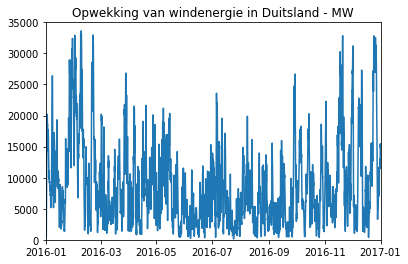

In [20]:
plt.plot(opwekking.index, opwekking['DE_wind_generation_actual'])
plt.title('Opwekking van windenergie in Duitsland - MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 35000)
plt.show()

(0, 30000)

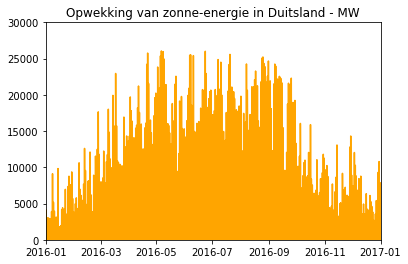

In [18]:
plt.plot(opwekking.index, opwekking['DE_solar_generation_actual'], c='Orange')
plt.title('Opwekking van zonne-energie in Duitsland - MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 30000)

In [21]:
opwekking_zon_wind = opwekking[['DE_wind_generation_actual', 'DE_solar_generation_actual']]

## Het Weer

In [22]:
weer = pd.read_csv("data/weather_data_GER_2016.csv",
                        parse_dates=[0], index_col=0)

In [23]:
weer.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2248704 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 14 columns):
cumulated hours    int64
lat                float64
lon                float64
v1                 float64
v2                 float64
v_50m              float64
h1                 int64
h2                 int64
z0                 float64
SWTDN              float64
SWGDN              float64
T                  float64
rho                float64
p                  float64
dtypes: float64(11), int64(3)
memory usage: 257.3 MB


In [24]:
weer.describe()

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
count,2.248704e+06,2.248704e+06,2.248704e+06,2.248704e+06,2.248704e+06,2.248704e+06,2.248704e+06,2.248704e+06,2.248704e+06,2.248704e+06,2.248704e+06,2.248704e+06,2.248704e+06,2.248704e+06
mean,4.391500e+03,5.125000e+01,1.031250e+01,2.944769e+00,4.297806e+00,6.057940e+00,2.692494e+00,1.069249e+01,2.003040e-01,2.777969e+02,1.457342e+02,2.823720e+02,1.211706e+00,9.855141e+04
std,2.535723e+03,2.304887e+00,2.881108e+00,2.131927e+00,2.563404e+00,3.117096e+00,1.967423e+00,1.967423e+00,4.000811e-01,3.604860e+02,2.225427e+02,7.932597e+00,5.054016e-02,3.217843e+03
min,0.000000e+00,4.750000e+01,5.625000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+01,3.383377e-05,0.000000e+00,0.000000e+00,2.484260e+02,1.014191e+00,8.431055e+04
25%,2.195750e+03,4.937500e+01,7.968750e+00,1.290000e+00,2.430000e+00,3.800000e+00,2.000000e+00,1.000000e+01,4.539990e-02,0.000000e+00,0.000000e+00,2.761092e+02,1.179575e+00,9.659333e+04
50%,4.391500e+03,5.125000e+01,1.031250e+01,2.470000e+00,3.700000e+00,5.730000e+00,2.000000e+00,1.000000e+01,6.577038e-02,2.749219e+01,5.232422e+00,2.815594e+02,1.214002e+00,9.909590e+04
75%,6.587250e+03,5.312500e+01,1.265625e+01,4.010000e+00,5.640000e+00,7.810000e+00,2.000000e+00,1.000000e+01,1.088612e-01,5.215625e+02,2.291875e+02,2.887227e+02,1.248635e+00,1.010968e+05
max,8.783000e+03,5.500000e+01,1.500000e+01,1.845000e+01,2.292000e+01,2.741000e+01,1.400000e+01,2.200000e+01,2.504888e+00,1.201500e+03,9.857500e+02,3.090045e+02,1.367682e+00,1.043319e+05


In [25]:
weer.head()

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 01:00:00+00:00,1,47.5,5.625,0.77,1.61,2.63,2,10,0.052510,0.0,0.0,277.025665,1.239390,99300.164062
2016-01-01 02:00:00+00:00,2,47.5,5.625,0.66,1.22,1.89,2,10,0.052495,0.0,0.0,277.223755,1.243861,99310.992188
2016-01-01 03:00:00+00:00,3,47.5,5.625,0.96,1.35,1.62,2,10,0.052480,0.0,0.0,277.133240,1.247390,99314.773438
2016-01-01 04:00:00+00:00,4,47.5,5.625,1.14,1.56,1.83,2,10,0.052480,0.0,0.0,276.867767,1.248869,99324.796875


In [26]:
weer.tail()

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-12-31 19:00:00+00:00,8779,55.0,15.0,10.45,12.60,14.26,2,10,0.001006,0.0,0.0,278.549011,1.272779,101755.281250
2016-12-31 20:00:00+00:00,8780,55.0,15.0,10.52,12.69,14.39,2,10,0.001021,0.0,0.0,278.574341,1.271909,101698.242188
2016-12-31 21:00:00+00:00,8781,55.0,15.0,10.49,12.65,14.38,2,10,0.001014,0.0,0.0,278.634644,1.270996,101653.398438
2016-12-31 22:00:00+00:00,8782,55.0,15.0,10.47,12.63,14.41,2,10,0.001009,0.0,0.0,278.678162,1.270252,101609.484375
2016-12-31 23:00:00+00:00,8783,55.0,15.0,10.39,12.53,14.33,2,10,0.000993,0.0,0.0,278.720184,1.269202,101545.859375


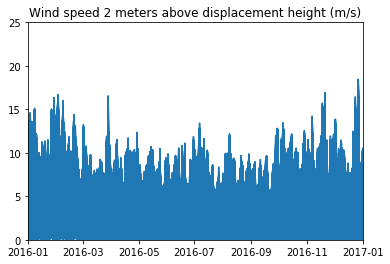

In [28]:
plt.plot(weer.index, weer['v1'])
plt.title('Wind speed 2 meters above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 25)
plt.show()

In [29]:
weer2 = weer.groupby(weer.index).mean()

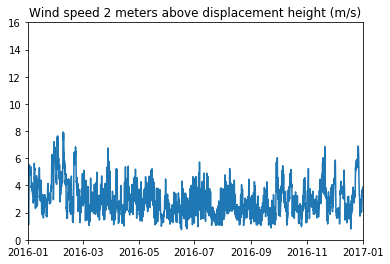

In [30]:
plt.plot(weer2.index, weer2['v1'])
plt.title('Wind speed 2 meters above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 16)
plt.show()

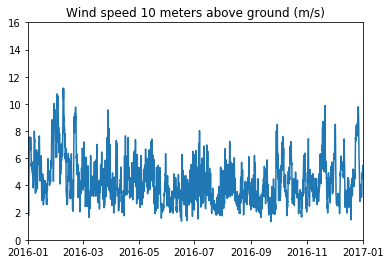

In [31]:
plt.plot(weer2.index, weer2['v2'])
plt.title('Wind speed 10 meters above ground (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 16)
plt.show()

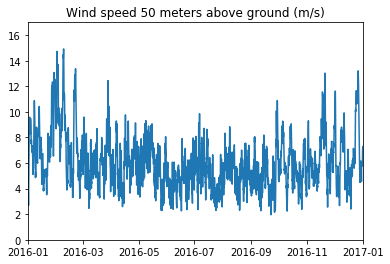

In [32]:
plt.plot(weer2.index, weer2['v_50m'])
plt.title('Wind speed 50 meters above ground (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 17)
plt.show()

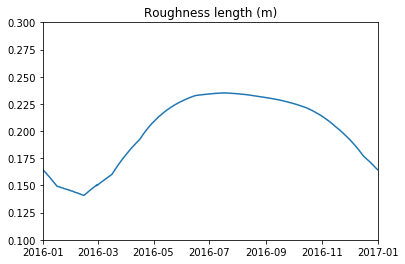

In [33]:
plt.plot(weer2.index, weer2['z0'])
plt.title('Roughness length (m)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0.1, 0.3)
plt.show()

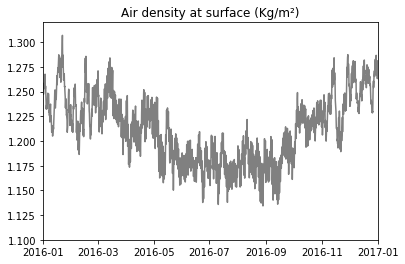

In [34]:
plt.plot(weer2.index, weer2['rho'], c='grey')
plt.title('Air density at surface (Kg/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(1.1, 1.32)
plt.show()

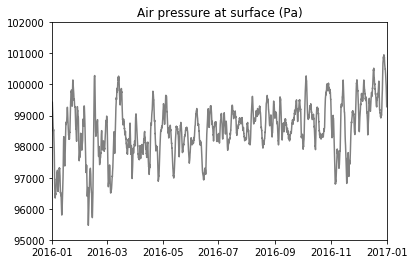

In [35]:
plt.plot(weer2.index, weer2['p'], c='grey')
plt.title('Air pressure at surface (Pa)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(95000, 102000)
plt.show()

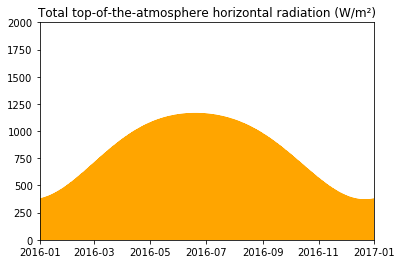

In [36]:
plt.plot(weer2.index, weer2['SWTDN'], c='Orange')
plt.title('Total top-of-the-atmosphere horizontal radiation (W/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 2000)
plt.show()

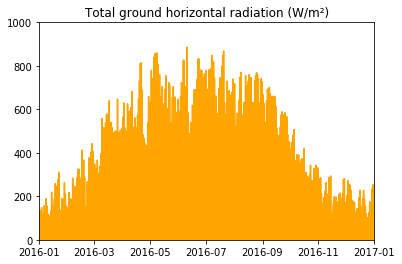

In [37]:
plt.plot(weer2.index, weer2['SWGDN'], c='Orange')
plt.title('Total ground horizontal radiation (W/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 1000)
plt.show()

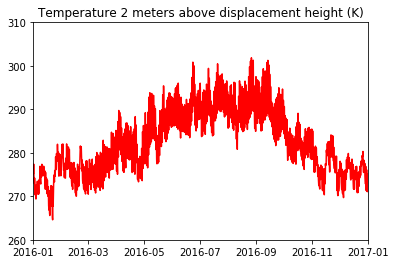

In [38]:
plt.plot(weer2.index, weer2['T'], c='Red')
plt.title('Temperature 2 meters above displacement height (K)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(260, 310)
plt.show()

In [39]:
weer2['T (C)'] = weer2['T'] - 273.15

In [40]:
weer2.loc['2016-06-06 15:00']

cumulated hours     3783.000000
lat                   51.250000
lon                   10.312500
v1                     2.572969
v2                     3.588281
v_50m                  4.322539
h1                     2.796875
h2                    10.796875
z0                     0.229741
SWTDN                744.194336
SWGDN                486.558594
T                    295.084717
rho                    1.167176
p                  99051.500000
T (C)                 21.934717
Name: 2016-06-06 15:00:00+00:00, dtype: float64

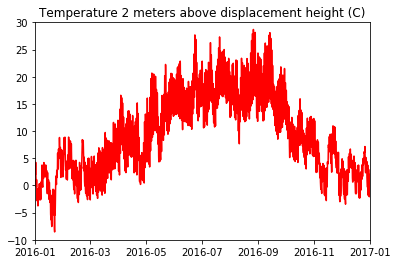

In [41]:
plt.plot(weer2.index, weer2['T (C)'], c='Red')
plt.title('Temperature 2 meters above displacement height (C)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(-10, 30)
plt.show()

In [42]:
correlatie = pd.merge(opwekking_zon_wind, weer2, how='left', left_index=True, right_index=True)
correlatie = correlatie.drop('T (C)', axis=1)

In [43]:
correlatie.head()

,DE_wind_generation_actual,DE_solar_generation_actual,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
utc_timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,8579.0,0.0,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,8542.0,0.0,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,8443.0,0.0,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,8295.0,0.0,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.0,0.0,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,7319.0,0.0,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.0,0.0,275.193369,1.254733,99319.750000


In [44]:
correlatie.loc['2016-01-01']

,DE_wind_generation_actual,DE_solar_generation_actual,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
utc_timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,8579.0,0.0,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.000000,0.000000,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,8542.0,0.0,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.000000,0.000000,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,8443.0,0.0,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.000000,0.000000,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,8295.0,0.0,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.000000,0.000000,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,7319.0,0.0,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.000000,0.000000,275.193369,1.254733,99319.750000
2016-01-01 05:00:00+00:00,6574.0,0.0,5.0,51.25,10.3125,2.207227,3.160312,4.445078,2.546875,10.546875,0.164153,0.000000,0.000000,275.184228,1.254969,99336.710938
2016-01-01 06:00:00+00:00,5624.0,0.0,6.0,51.25,10.3125,2.099336,3.027148,4.291758,2.546875,10.546875,0.164116,0.029503,0.002406,275.151314,1.255247,99357.078125
2016-01-01 07:00:00+00:00,4644.0,137.0,7.0,51.25,10.3125,2.001992,2.903750,4.116836,2.542969,10.542969,0.164068,32.701265,4.885147,275.175961,1.255487,99383.765625
2016-01-01 08:00:00+00:00,3733.0,964.0,8.0,51.25,10.3125,2.061836,2.915977,3.855273,2.542969,10.542969,0.164031,167.523132,34.330536,275.612767,1.255295,99415.406250


In [45]:
correlatie.describe()

,DE_wind_generation_actual,DE_solar_generation_actual,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
count,8784.000000,8784.000000,8784.000000,8784.00,8784.0000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8766.863160,3934.747723,4391.500000,51.25,10.3125,2.944769,4.297806,6.057940,2.692494,10.692494,0.200304,277.796861,145.734200,282.372003,1.211706,98551.406797
std,6846.410998,6032.517474,2535.866716,0.00,0.0000,1.193912,1.609519,2.085696,0.131112,0.131112,0.032243,359.324264,212.186633,7.583916,0.034573,857.964428
min,135.000000,0.000000,0.000000,51.25,10.3125,0.746523,1.345508,1.958984,2.457031,10.457031,0.140880,0.000000,0.000000,264.596945,1.134293,95467.640625
25%,3617.000000,0.000000,2195.750000,51.25,10.3125,2.071338,3.143398,4.632188,2.582031,10.582031,0.170815,0.000000,0.000000,276.056676,1.181916,98083.013672
50%,6944.000000,121.500000,4391.500000,51.25,10.3125,2.722852,3.951309,5.723828,2.726562,10.726562,0.212010,31.467281,7.846700,281.242294,1.212809,98592.644531
75%,11799.500000,6263.500000,6587.250000,51.25,10.3125,3.579150,5.109111,7.103809,2.812500,10.812500,0.229985,522.313965,242.382843,288.673904,1.236644,99107.582031
max,33626.000000,26055.000000,8783.000000,51.25,10.3125,7.927695,11.164297,14.922969,2.832031,10.832031,0.235163,1160.939453,885.725586,301.845276,1.306860,100956.546875


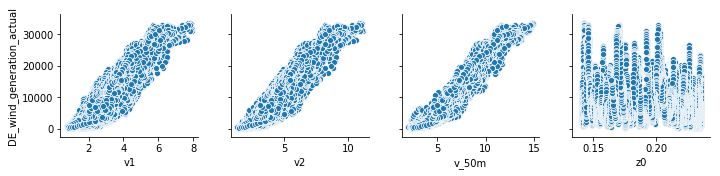

In [46]:
sns.pairplot(correlatie, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_wind_generation_actual'])

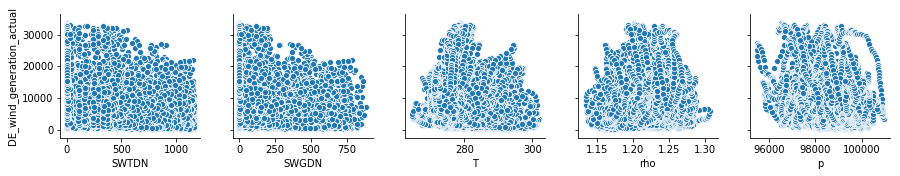

In [47]:
sns.pairplot(correlatie, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['DE_wind_generation_actual'])

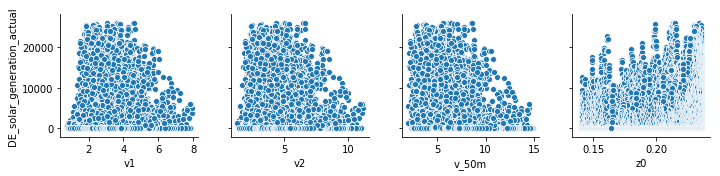

In [48]:
sns.pairplot(correlatie, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_solar_generation_actual'])


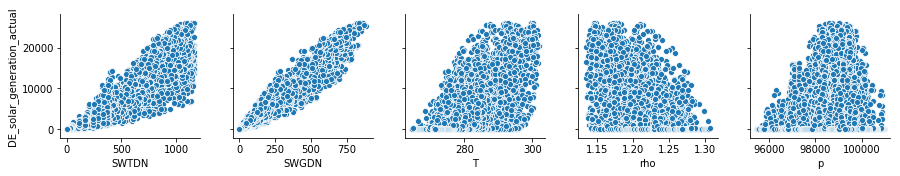

In [49]:
sns.pairplot(correlatie, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['DE_solar_generation_actual'])

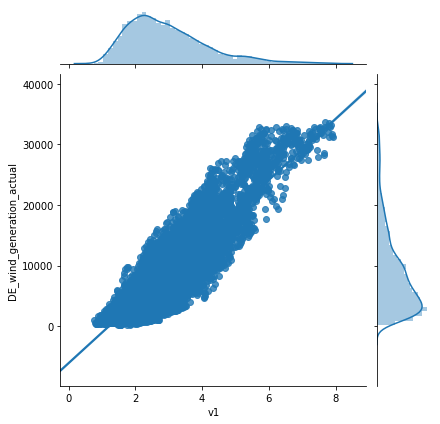

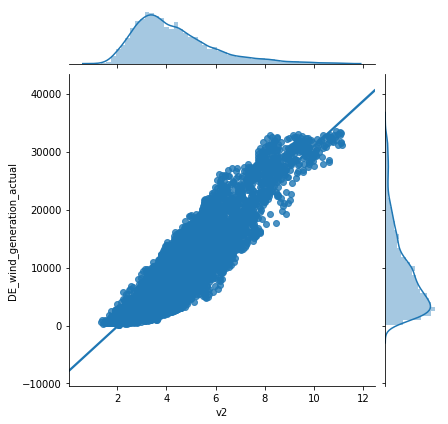

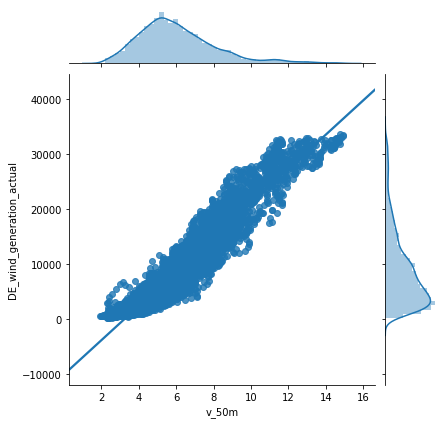

In [50]:
sns.jointplot(x='v1', y='DE_wind_generation_actual', data=correlatie, kind='reg')
sns.jointplot(x='v2', y='DE_wind_generation_actual', data=correlatie, kind='reg')
sns.jointplot(x='v_50m', y='DE_wind_generation_actual', data=correlatie, kind='reg')

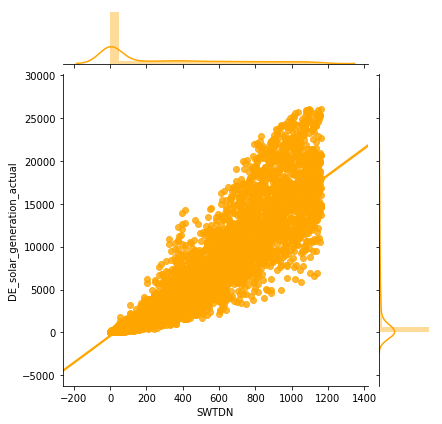

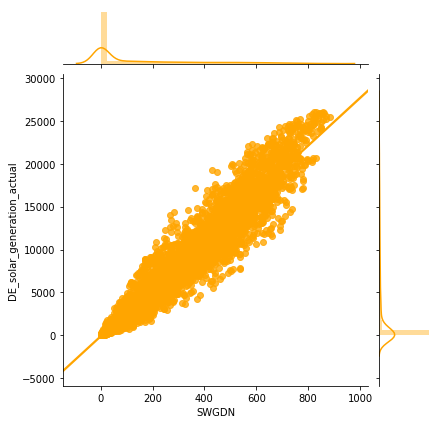

In [67]:
sns.jointplot(x='SWTDN', y='DE_solar_generation_actual', data=correlatie, kind='reg', color='orange')
sns.jointplot(x='SWGDN', y='DE_solar_generation_actual', data=correlatie, kind='reg', color='orange')

In [52]:
correlatie.loc['2016-10-30 01:00:00+00:00']

DE_wind_generation_actual      8007.000000
DE_solar_generation_actual        0.000000
cumulated hours                7273.000000
lat                              51.250000
lon                              10.312500
v1                                2.547891
v2                                3.885742
v_50m                             5.796484
h1                                2.757812
h2                               10.757812
z0                                0.214824
SWTDN                             0.000000
SWGDN                             0.000000
T                               278.840897
rho                               1.238615
p                             99837.945312
Name: 2016-10-30 01:00:00+00:00, dtype: float64

In [53]:
correlatie.fillna(0)
correlatie.loc['2016-10-30']

,DE_wind_generation_actual,DE_solar_generation_actual,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
utc_timestamp,,,,,,,,,,,,,,,,
2016-10-30 00:00:00+00:00,8245.0,0.0,7272.0,51.25,10.3125,2.533984,3.892930,5.904141,2.757812,10.757812,0.214854,0.000000,0.000000,278.922348,1.237819,99854.257812
2016-10-30 01:00:00+00:00,8007.0,0.0,7273.0,51.25,10.3125,2.547891,3.885742,5.796484,2.757812,10.757812,0.214824,0.000000,0.000000,278.840897,1.238615,99837.945312
2016-10-30 02:00:00+00:00,7870.0,0.0,7274.0,51.25,10.3125,2.540312,3.848945,5.656445,2.757812,10.757812,0.214804,0.000000,0.000000,278.789505,1.239154,99811.187500
2016-10-30 03:00:00+00:00,7506.0,0.0,7275.0,51.25,10.3125,2.506367,3.774531,5.491992,2.757812,10.757812,0.214789,0.000000,0.000000,278.785721,1.239485,99790.929688
2016-10-30 04:00:00+00:00,7139.0,0.0,7276.0,51.25,10.3125,2.432695,3.643477,5.279883,2.757812,10.757812,0.214768,0.000000,0.000000,278.777740,1.239946,99784.429688
2016-10-30 05:00:00+00:00,6892.0,2.0,7277.0,51.25,10.3125,2.343437,3.496992,5.080547,2.757812,10.757812,0.214730,0.000000,0.000000,278.750755,1.240518,99786.929688
2016-10-30 06:00:00+00:00,6019.0,462.0,7278.0,51.25,10.3125,2.272930,3.381953,4.864375,2.757812,10.757812,0.214708,30.807933,7.385613,278.777840,1.241268,99807.281250
2016-10-30 07:00:00+00:00,5021.0,2916.0,7279.0,51.25,10.3125,2.388203,3.453203,4.565391,2.753906,10.753906,0.214678,196.460205,65.303139,279.627678,1.240985,99832.625000
2016-10-30 08:00:00+00:00,3964.0,6260.0,7280.0,51.25,10.3125,2.548242,3.561719,4.390273,2.753906,10.753906,0.214656,362.486328,161.568253,280.936310,1.237932,99841.109375


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

X_wind = correlatie[['v1', 'v2','v_50m']]
y_wind = correlatie['DE_wind_generation_actual']

scores_wind = cross_val_score(lr, X_wind, y_wind, cv=5)
print(scores_wind, "\naverage =", np.mean(scores_wind))

[0.88261401 0.88886305 0.83623262 0.88974363 0.85338174] 
average = 0.8701670101722788


In [66]:
X_solar = correlatie[['SWTDN', 'SWGDN']]
y_solar = correlatie['DE_solar_generation_actual']

scores_solar = cross_val_score(lr, X_solar, y_solar, cv=5)
print(scores_solar, "\naverage =", np.mean(scores_solar))

[0.89032422 0.95029912 0.96054033 0.95179363 0.87755236] 
average = 0.9261019305633825
